In [1]:
import sys
%load_ext rpy2.ipython

In [2]:
from utils import *

In [3]:
import numpy as np
import gpflow

import matplotlib.pyplot as plt
import gpflow.multioutput.kernels as mk
import gpflow.multioutput.features as mf
import os, sys

from MixtureSVGP import MixtureSVGP
import tensorflow as tf
import pickle

In [4]:
model_path = './output/K2_L10'
model_name = model_path.split('/')[-1]
params, assng, logf, a, b, c = pickle.load(open(model_path, 'rb'))

In [5]:
from Assignments import Assignments
N, K = assng.Phi.shape
G, L = assng.Lambda.shape
assignments= Assignments(assng.pi, assng.psi, assng.rho, N, G, K, L, 16)

assignments.Phi = assng.Phi
assignments.Lambda = assng.Lambda
assignments.Gamma = assng.Gamma

N, K = assignments.Phi.shape
G, L = assignments.Lambda.shape
m = reload_model(assignments, params, 'shared')

40


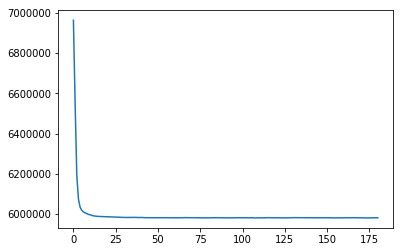

In [27]:
plt.plot(logf[:])

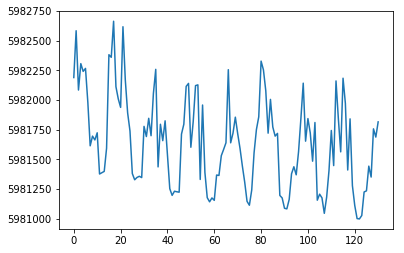

In [29]:
plt.plot(logf[50:])

In [7]:
assignments.Phi.sum(axis=0)

array([ 7., 12.])

In [8]:
m.assign(params)

In [9]:
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
MixtureSVGP/kern/kern/variance,Parameter,None,+ve,False,(),True,0.8582810790320362
MixtureSVGP/kern/kern/lengthscales,Parameter,None,+ve,False,(),True,1.0847900398024946
MixtureSVGP/likelihood/variance,Parameter,None,+ve,False,(),True,0.6583812086826248
MixtureSVGP/feature/feat/Z,Parameter,None,(none),False,"(16, 1)",True,"[[0.0], [1.0], [2.0], [3.0], [4.0], [5.0], [6...."
MixtureSVGP/q_mu,Parameter,None,(none),False,"(16, 40)",True,"[[0.816032945049133, -0.24783301172560207, 0.3..."
MixtureSVGP/q_sqrt,Parameter,None,LoTri->vec,False,"(40, 16, 16)",True,"[[[0.01458465623262565, 0.0, 0.0, 0.0, 0.0, 0...."
MixtureSVGP/weights,Parameter,None,(none),False,"(1, 40)",True,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [10]:
pX = np.linspace(0, 16, 100)[:, None]
fm, fV = m.predict_f(pX)
fm2 = fm.reshape(-1, K, L)

In [21]:
pickle_path = './output/' + model_name + 'hallmark_enrichments'
results = gen_gsea_df(assignments, pickle_path, threshold=1e-2, rerun=True)

/home/karl/Code/Research/ipsc_analysis/utils.py:113: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = data_df.as_matrix()


In [22]:
idx = pd.IndexSlice
active_clusters = np.where(np.any(results.T.loc[:, idx[:, 'bonferonni-adjusted']] < 0.01, axis=0) == 1)[0]
active_results = pd.concat([results.T.iloc[:, results.index.get_level_values(0).get_loc(a)] for a in active_clusters], axis=1)
active_gene_sets = np.where(np.any(active_results.loc[:, idx[:, 'bonferonni-adjusted']] < 0.01, axis=1))[0]
active_results = active_results.iloc[active_gene_sets]
active_results.loc[:, idx[:, 'bonferonni-adjusted']]

,1,2,4,5,11,14,16,17,18
,bonferonni-adjusted,bonferonni-adjusted,bonferonni-adjusted,bonferonni-adjusted,bonferonni-adjusted,bonferonni-adjusted,bonferonni-adjusted,bonferonni-adjusted,bonferonni-adjusted
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.000518026,1,1,1,0.803746,1,1,1,1
HALLMARK_MITOTIC_SPINDLE,1,1,1,1,1,0.023253,1,2.55053e-11,1
HALLMARK_TGF_BETA_SIGNALING,0.245164,1,1,1,1,0.000136527,1,1,1
HALLMARK_DNA_REPAIR,1,0.000724243,1,1,1,1,1,6.318e-06,1
HALLMARK_G2M_CHECKPOINT,1,1,1,0.0605813,1,1,1,1.69944e-57,1
HALLMARK_MYOGENESIS,2.69682e-05,1,1,1,1,1,1.29399e-12,1,1
HALLMARK_PROTEIN_SECRETION,1,1,1,1,1,1,0.00275608,1,1
HALLMARK_COMPLEMENT,1,1,1,1,1.6978e-05,1,1,1,1
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,1,0.00292065,1,1,1,1,1,1,1


In [23]:
fmean, fvar = m.predict_f(np.linspace(0, 15, 100)[:, None])

fmean = pd.DataFrame(fmean)
fvar = pd.DataFrame(fvar)

fmean.to_csv('./output/' + model_name + '_fmean')
fvar.to_csv('./output/' + model_name + '_fvar')

In [24]:
fmean = pd.DataFrame(fmean)
fvar = pd.DataFrame(fvar)

In [25]:
fmean.to_csv('./output/' + model_name + '_fmean')
fvar.to_csv('./output/' + model_name + '_fvar')

In [26]:
normalized_data_df, _, _ = load_data('./data/quantile_normalized_no_projection.txt')
gene_names = np.array(normalized_data_df.columns)

X = pd.DataFrame([gene_names, assignments.Lambda.argmax(1)], index=['gene', 'cluster']).T.set_index('gene')
X.to_csv('./output/' + model_name + '_gene_assignments')

/home/karl/Code/Research/ipsc_analysis/utils.py:113: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = data_df.as_matrix()
